## **Data source link:** [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).
#### Familiarize with the HR dataset
Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level |
last_evaluation|Score of employee's last performance review |
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Planning Stage
#### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1)**Who are your stakeholders for this project?**

 ***Primary Stakeholders:***

  - Senior Leadership Team (Concerned about the high turnover and its financial impact)

  - Human Resources (Involved in surveying employees and understanding turnover drivers)

 ***Secondary Stakeholders:***

  - Department Managers (Affected by turnover and responsible for retention strategies)

  - Employees (The target group for improving retention strategies)

2)**What are you trying to solve or accomplish?**

   - The main objective is to predict employee turnover and identify the key factors contributing to employees leaving Salifort Motors.
    
   - By understanding these factors, the company aims to improve employee retention, reduce turnover costs, and enhance job satisfaction.
    
   - Additionally, the project seeks to provide actionable insights to the HR and leadership team to optimize training, recruitment, and employee engagement strategies.

3)**What are your initial observations when you explore the data?**

  - ***Initial exploration would likely reveal:***
    
      - Distributions of features like job title, department, average monthly hours, number of projects, and promotion status.
        
      - Trends or correlations between workload (projects, hours worked) and employee attrition.
        
      - Potential impact of lack of promotion or high workloads on turnover rates.
        
      - Differences in turnover across departments or job titles.
   
4**What resources do you find yourself using as you complete this stage?**

 - Pandas Documentation: For data manipulation and preprocessing:

     - [Pandas](https://pandas.pydata.org/docs/reference/index.html)

 - Seaborn and Matplotlib Documentation: For data visualization and identifying patterns:

     - [Seaborn](https://seaborn.pydata.org/api.html), [Matplotlib](https://matplotlib.org/stable/api/index.html)

 - Scikit-Learn Documentation: For predictive modeling and evaluating classification models:

     - [scikit-learn](https://scikit-learn.org/stable/api/index.html)

 - Kaggle Notebooks and Articles: For reference on similar employee attrition models and best practices:

     - [Kaggle](https://www.kaggle.com/)

### Import packages

In [5]:
!pip install xgboost

In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,\
accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier, plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# Loading dataset into a dataframe
df0 = pd.read_csv(r"F:\Data Analyst Strudy\Courcera\Google Advance Data Analytics\Capstone Projects\Project_Files\Files\HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [10]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The dataset contains `14,999 rows` and `10 columns` There is `no null values` in a dataset. 

### Gather descriptive statistics about the data

In [13]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
# Descirbing categoryical values.
df0.describe(exclude='number')

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Rename columns

In [16]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [18]:
# Rename columns as needed
df0.rename(columns={'number_project':'number_of_project','time_spend_company':'tenure',
                    'average_montly_hours':'average_monthly_hours',
                    'Work_accident':'work_accident','Department':'department'},inplace=True)

## Display all column names after the update
df0.head()

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [24]:
# Check for missing values
df0.isna().sum()/df0.shape[0]

satisfaction_level       0.0
last_evaluation          0.0
number_of_project        0.0
average_monthly_hours    0.0
tenure                   0.0
work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

There is no missing values in the Dataset

### Check duplicates

Check for any duplicate entries in the data.

In [30]:
# Check for duplicates
df0.duplicated().sum()

3008

In [31]:
# Inspect some rows containing duplicates as needed
duplicates = df0[df0.duplicated()]
duplicates.head()

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [32]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(ignore_index=True)

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

(array([1, 2, 3, 4]),
 [Text(1, 0, 'satisfaction_level'),
  Text(2, 0, 'last_evaluation'),
  Text(3, 0, 'number_of_project'),
  Text(4, 0, 'tenure')])

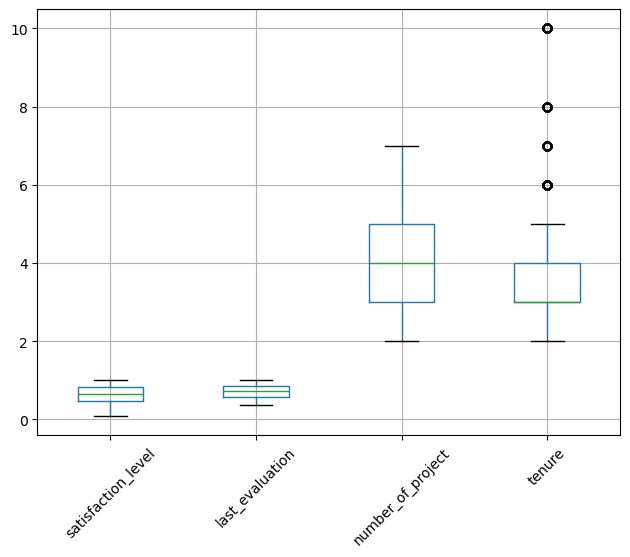

In [39]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
df1.drop(['average_monthly_hours','work_accident','left','promotion_last_5years'],axis=1).boxplot()
plt.tight_layout()
plt.xticks(rotation=45)

In [41]:
# Determine the number of rows containing outliers
numeric_data = df1.select_dtypes(include='number')
numeric_data.drop(['promotion_last_5years','left','work_accident'],axis=1,inplace=True)
outlier_size = set()
for col in numeric_data:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    lower_lim = q1 - (1.5*iqr)
    upper_lim = q3 +(1.5*iqr)
    outliers_col = numeric_data[(numeric_data[col]>upper_lim) | (numeric_data[col]<lower_lim)]
    outlier_size.update(outliers_col.index)
number_of_outlier_rows = len(outlier_size)
print('Total_number of rows with outliers:',number_of_outlier_rows)

# Isoloting the column that contains outliers
numeric_data = df1.select_dtypes(include='number')
numeric_data.drop(['promotion_last_5years','left','work_accident'],axis=1,inplace=True)
outlier_col_name = []
for col in numeric_data:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    lower_lim = q1 - (1.5*iqr)
    upper_lim = q3 +(1.5*iqr)
    outliers_col = numeric_data[(numeric_data[col]>upper_lim) | (numeric_data[col]<lower_lim)]
    if outliers_col.shape[0]>0:
        outlier_col_name.append(col)

print('Columns with outliers             :',outlier_col_name)

Total_number of rows with outliers: 824
Columns with outliers             : ['tenure']


There are totaly `824` rows contains outliers in `total_year_spend` variables. It is because the most of the peoples in Salifort Motors used to stay 3 to 4 years. onlys 25% of employees stayed above 4 years and the maximum of 10 years.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Data Exploration (EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [45]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print('Number of peoples stayed vs left:')
print('Stayed:',df1['left'].value_counts()[0],'\n''left:',df1['left'].value_counts()[1])
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print()
print('percentage of peoples stayed vs left:')
print('Stayed:',df1['left'].value_counts(normalize=True)[0].round(3)
      ,'\n''left:',df1['left'].value_counts(normalize=True)[1].round(3))

Number of peoples stayed vs left:
Stayed: 10000 
left: 1991

percentage of peoples stayed vs left:
Stayed: 0.834 
left: 0.166


In [46]:
# Importing required packages
from collections import Counter

In [47]:
dpt_lft = (pd.crosstab(df1['department'],df1['left'],normalize=True).round(3)*100).sort_values(1,ascending=False)

sal_dept = (pd.crosstab(df1['department'],df1['salary'],normalize=True).round(2))*100

counts= pd.DataFrame.from_dict(data=dict(Counter(df1['department'])),orient='index').rename(columns={0:'Count'})
counts['counts_%'] = np.round((counts['Count']/counts['Count'].sum()),3)*100

In [48]:
department_stat = sal_dept.join(other=dpt_lft,on='department',how='left').\
sort_values(1,ascending=False).rename(columns={'low':'low_%','medium':'medium_%'
                                               ,'high':'high_%',
                                               0:'stayed_%',1:'left_%'})

In [49]:
department_stat = department_stat.join(counts, on='department',how='left')

department_stat

,high_%,low_%,medium_%,stayed_%,left_%,Count,counts_%
department,,,,,,,
sales,2.0,13.0,12.0,22.4,4.6,3239,27.0
technical,1.0,9.0,8.0,15.5,3.3,2244,18.7
support,1.0,7.0,7.0,12.6,2.6,1821,15.2
IT,1.0,4.0,4.0,6.8,1.3,976,8.1
accounting,1.0,2.0,2.0,4.3,0.9,621,5.2
hr,0.0,2.0,2.0,4.1,0.9,601,5.0
marketing,1.0,3.0,3.0,4.7,0.9,673,5.6
product_mng,0.0,3.0,2.0,4.8,0.9,686,5.7
RandD,0.0,3.0,3.0,5.1,0.7,694,5.8


Out of `11991` Total Employees including HR team, The Sales department has `3239` employees which is `27 percent` from the total count. Amoung them `550` of the peoples are left the organization approximatly `5 percent`. 



### Data visualizations

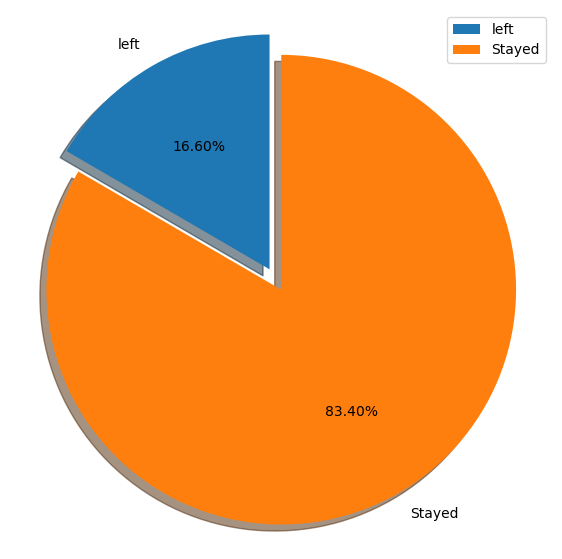

In [54]:
labels = 'left', 'Stayed'
sizes = [df1.left[df1['left']==1].count(),df1.left[df1['left']==0].count()]
explode = (0,0.1)
fig1,ax1=plt.subplots(figsize=(7,7))
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.2f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(fontsize=10)
plt.show()

The data shows Out of `11991` observations, About 16% of the Employees are left the company and remaining stayed. This class imbalance in the dataset we affect the model accuracy. we have to ensure the model has to predict this 16% of the left employees accuratly as it is intrested to the HR team to predict wether the employee left or stayed.  

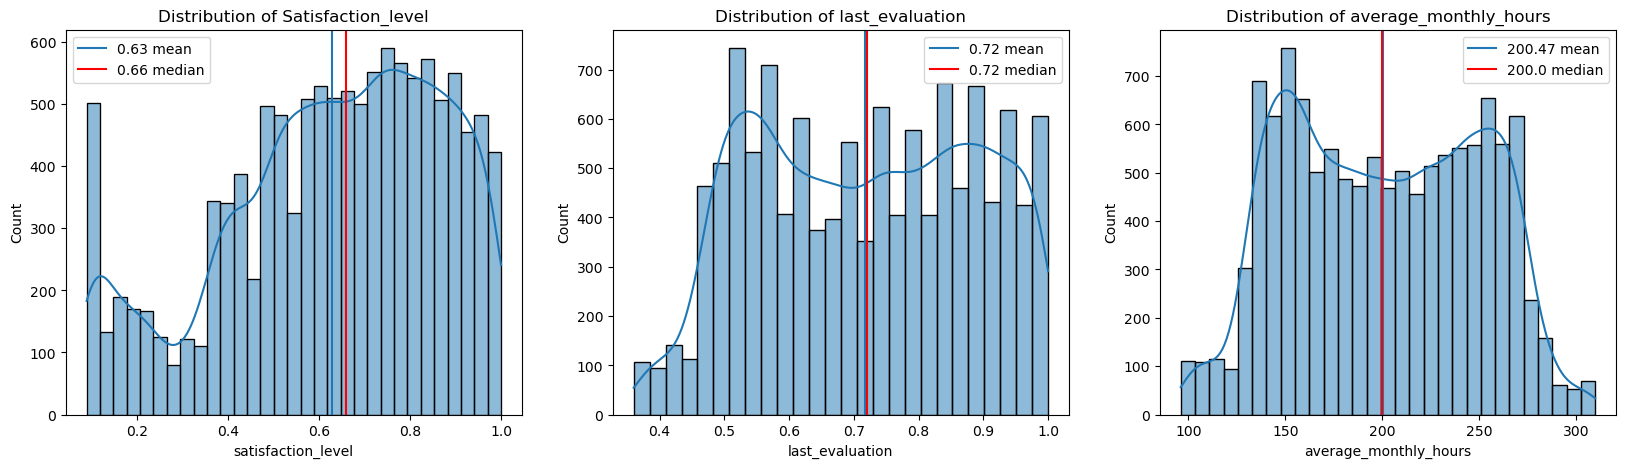

In [193]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,3,figsize=(20,5))
means, meadians = str(round(df1['satisfaction_level'].mean(),2)),str(round(df1['satisfaction_level'].median(),2))
sns.histplot(df1['satisfaction_level'],kde=True,ax=ax[0])
ax[0].set_title('Distribution of Satisfaction_level')
ax[0].axvline(df1['satisfaction_level'].mean(), label=means+' mean')
ax[0].axvline(df1['satisfaction_level'].median(),c='r', label=meadians+' median')
ax[0].legend()

means, meadians = str(round(df1['last_evaluation'].mean(),2)),str(round(df1['last_evaluation'].median(),2))
sns.histplot(df1['last_evaluation'],kde=True,ax=ax[1])
ax[1].set_title('Distribution of last_evaluation')
ax[1].axvline(df1['last_evaluation'].mean(), label=means+' mean')
ax[1].axvline(df1['last_evaluation'].median(),c='r', label=meadians+' median')
ax[1].legend()

means, meadians = str(round(df1['average_monthly_hours'].mean(),2)),str(round(df1['average_monthly_hours'].median(),2))
sns.histplot(df1['average_monthly_hours'],kde=True,ax=ax[2])
ax[2].set_title('Distribution of average_monthly_hours')
ax[2].axvline(df1['average_monthly_hours'].mean(), label=means+' mean')
ax[2].axvline(df1['average_monthly_hours'].median(),c='r', label=meadians+' median')
ax[2].legend()

plt.show()

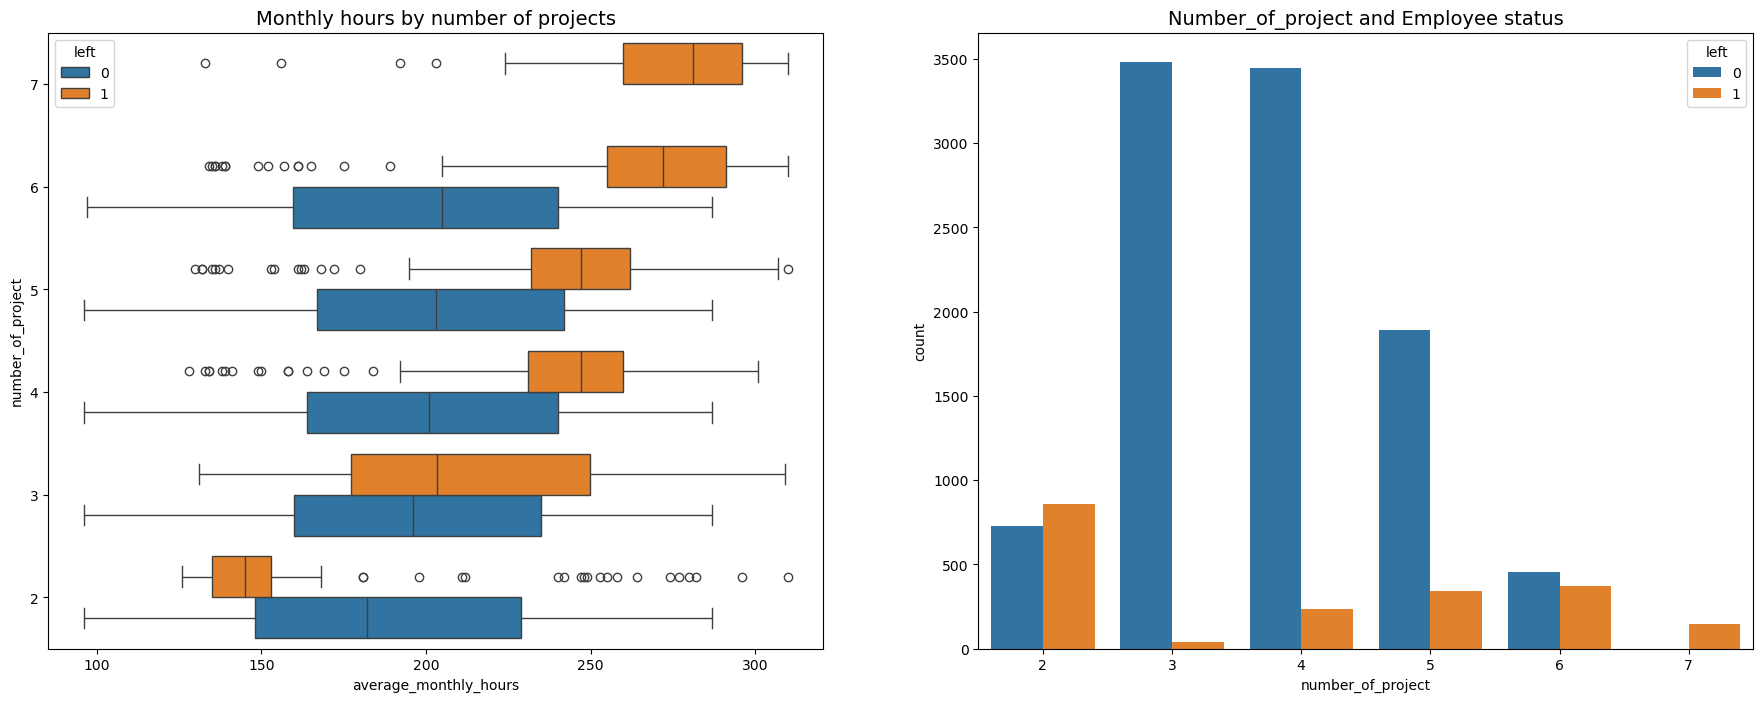

In [60]:
# Create a plot as needed
### YOUR CODE HERE ###
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_of_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
#tenure_stay = df1[df1['left']==0]['number_project']
#tenure_left = df1[df1['left']==1]['number_project']
sns.countplot(data=df1, x='number_of_project', hue='left', ax=ax[1])
ax[1].set_title('Number_of_project and Employee status', fontsize='14')
plt.show()

Let's say the avarge working days in an organisation is 5 days per week and 8 hours per day( Monday-Friday), Then `5*8*4*12/12` which gives `160 hours per year`. Here we coud see that most employes working above averge working hours in both left and stayed people, the range of worked hours for stayed peoples is `~145-245 hrs` and for the people who left is `130-290 hrs`. 

**Boxplot Analysis:** Monthly Hours by Number of Projects
 - The boxplot shows the distribution of average_monthly_hours across different numbers of projects, separated by employees who left (1) and stayed (0).

 - Employees with 4 to 6 projects and higher average monthly hours are more likely to leave, as indicated by the orange boxes.

 - For instance, employees who worked on 6 or 7 projects tend to have much higher working hours and are mostly represented in the "left" category.

 - This suggests workload overload might be driving employee churn.

**Business Insight:**
 - Focus on workload balancing for employees with 4 or more projects. Consider distributing tasks more evenly or introducing project rotation to prevent burnout.
  - If necessary, conduct performance assessments to identify specific areas where employees struggle while handling multiple projects. This will help to pinpoint skill gaps and allow for targeted training programs to boost productivity and confidence in task management.

In [64]:
from scipy.stats import chi2_contingency
## Relationship between Job Promotions and  people who left
pd.crosstab(df1['promotion_last_5years'],df1['left'],margins=False,normalize=True)

left,0,1
promotion_last_5years,,
0,0.817697,0.165374
1,0.016262,0.000667


lets perform `chi_square test` to check wether there is any significant association between this two groups.

In [66]:
con_table = pd.crosstab(df1['promotion_last_5years'],df1['left'],margins=False)
print(con_table)

left                      0     1
promotion_last_5years            
0                      9805  1983
1                       195     8


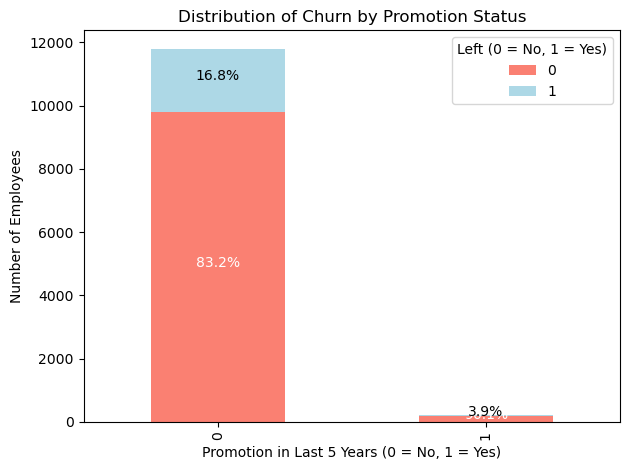

In [67]:
## Visual Representation
con_table.plot(kind='bar',stacked=True,color=['salmon', 'lightblue'])
plt.title('Distribution of Churn by Promotion Status')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.legend(title='Left (0 = No, 1 = Yes)')
plt.tight_layout()

for index, (no_promo, promo) in enumerate(con_table.values):
    total = no_promo + promo
    plt.text(index, no_promo / 2, f'{no_promo / total:.1%}', ha='center', color='white')
    plt.text(index, no_promo + promo / 2, f'{promo / total:.1%}', ha='center', color='black')

plt.show()

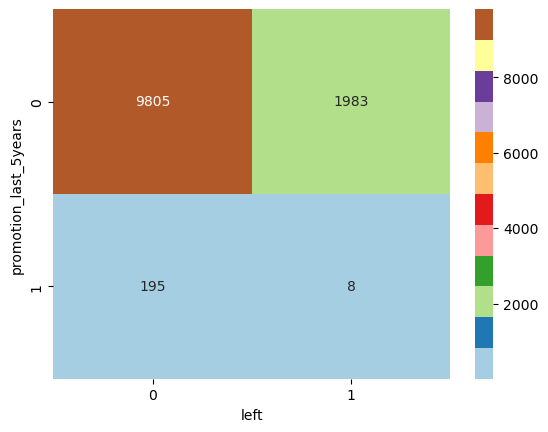

In [68]:
## Visual Representation
ax = sns.heatmap(con_table,annot=True, cmap='Paired',fmt='g')
plt.show()

Here `1 = Yes` and `0 = No`

In [70]:
chi2, p, dof, expected = chi2_contingency(con_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 22.992127549276592
P-value: 1.6266615348676462e-06
Degrees of Freedom: 1
Expected Frequencies:
[[9830.70636311 1957.29363689]
 [ 169.29363689   33.70636311]]


### Observations 
**P-value:** `1.6266615348676462e-06`, which is far less than `0.05`, indicates a `significant association between`

 - The observed values differ substantially from the expected ones.

 - Employees who were not promoted in the last 5 years are more likely to leave than expected under independence.

 - Employees who were promoted are less likely to leave compared to the expectation if there was no relationship.
 
 - **Promotions Matter:** Lack of promotions is significantly linked to employee churn. This suggests that employees feel unrecognized or unmotivated if they do not see career advancement.

 - **Retention Strategy:** Focused promotion and career development programs could reduce churn rates. Employees who feel valued and see growth are more likely to stay.

 - **Targeted Intervention:** HR and management can identify employees who haven’t been promoted in the last 5 years and engage them with development plans, mentorship, and clear growth pathways.

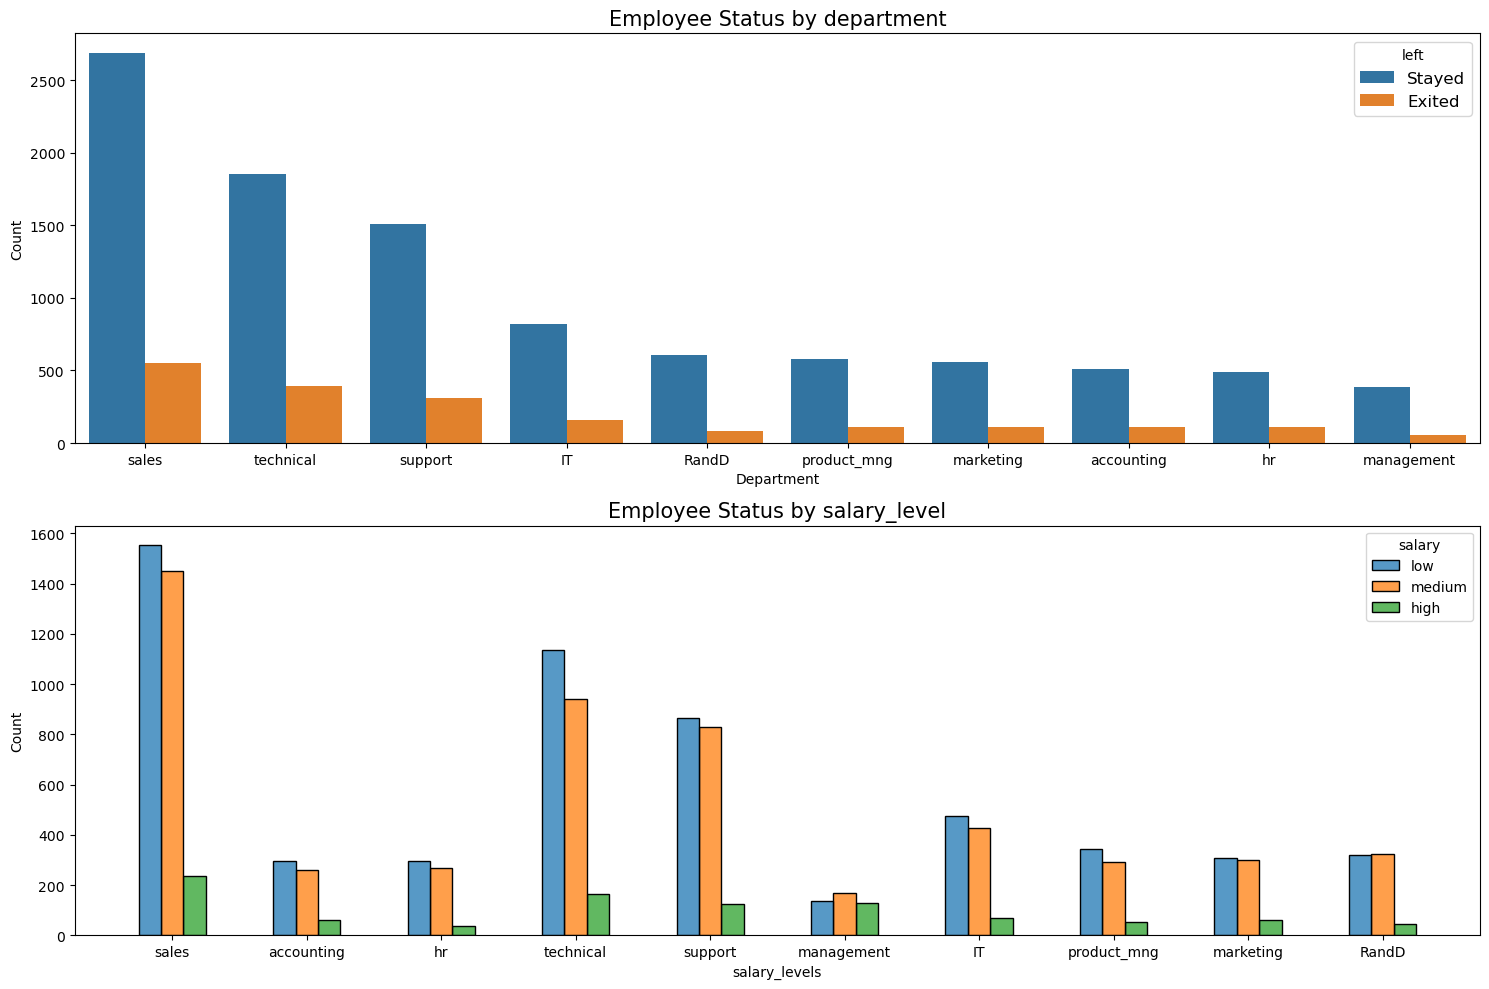

In [72]:
# Create a plot as needed
### YOUR CODE HERE ###
## Analysing number of peoples stayed vs left based on Departments 
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.countplot(data=df1,x='department',hue='left',order=df1['department'].value_counts().index, ax=ax[0]);
ax[0].set_title('Employee Status by department',fontsize=15)
ax[0].set_xlabel('Department')
ax[0].set_ylabel('Count')
ax[0].legend(title='left', labels=['Stayed', 'Exited'],loc='upper right',fontsize=12)

## Analysing number of peoples stayed vs left based on salary
chat_2 = sns.histplot(data=df1,x='department',hue='salary',hue_order=['low', 'medium', 'high'
                                                                     ],discrete=1, multiple='dodge', shrink=.5, ax=ax[1]);
ax[1].set_title('Employee Status by salary_level',fontsize=15)
ax[1].set_xlabel('salary_levels')
ax[1].set_ylabel('Count')
plt.tight_layout()

In [73]:
df1.head() 

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: >

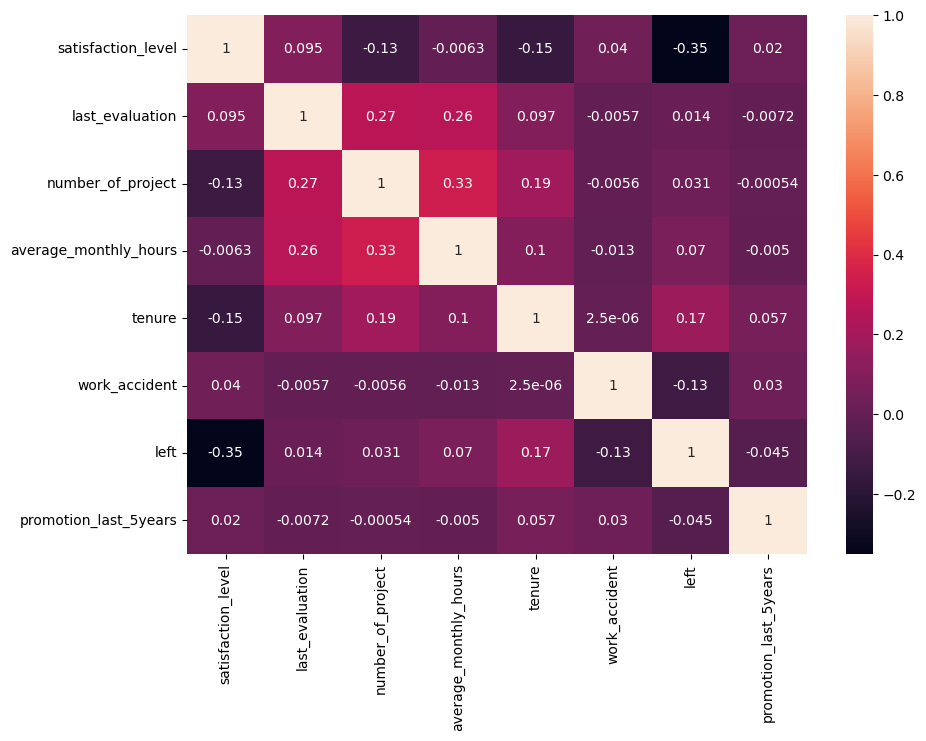

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(numeric_only=True),annot=True)

we coud see that `number_of_projects`, `averge_monthly_hours` and `last evaluvation` are correlated. and `satisfaction` has negative correlation with `left` variables.

## Preparing the dataset for Model Construction

In [77]:
## Outliers

# Filtering the data
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
iqr = q3-q1
lower_lim = q1 - (1.5*iqr)
upper_lim = q3 +(1.5*iqr)
outliers_col = df1[(df1['tenure']>upper_lim) | (numeric_data['tenure']<lower_lim)]

# Droping the data
ml_data = df1.drop(outliers_col.index, axis=0)
ml_data.shape

(11167, 10)

In [78]:
## Conveting the data type
ml_data['salary'] = pd.Categorical(ml_data['salary'], categories=['low', 'medium', 'high'], ordered=True)
print('df1_salary_data type:',df1['salary'].dtypes)
print('ML_data_salary_data type:',ml_data['salary'].dtypes)

df1_salary_data type: object
ML_data_salary_data type: category


In [80]:
ml_data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_of_project           int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
department                 object
salary                   category
dtype: object

In [81]:
## Validating the changes
print('Before convertion:')
print(ml_data['salary'].value_counts())

ml_data['salary'] = ml_data['salary'].cat.codes
print()

print('After convertion:')
print(ml_data['salary'].value_counts())

Before convertion:
salary
low       5429
medium    4854
high       884
Name: count, dtype: int64

After convertion:
salary
0    5429
1    4854
2     884
Name: count, dtype: int64


It's Clear that `0 = low`, `1 = medium`, `2 = high`

In [83]:
# Converting Categorical veriables to Numerical values.
ml_data = pd.get_dummies(data=ml_data,columns=['department'], drop_first=True)
ml_data.head()

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,True,False,False


### Validating the data set

In [100]:
ml_data.isna().sum().transpose()

satisfaction_level        0
last_evaluation           0
number_of_project         0
average_monthly_hours     0
tenure                    0
work_accident             0
left                      0
promotion_last_5years     0
salary                    0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64

In [102]:
ml_data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_of_project           int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                       int8
department_RandD             bool
department_accounting        bool
department_hr                bool
department_management        bool
department_marketing         bool
department_product_mng       bool
department_sales             bool
department_support           bool
department_technical         bool
dtype: object

In [104]:
ml_data.agg(['min','max'])

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
min,0.09,0.36,2,96,2,0,0,0,0,False,False,False,False,False,False,False,False,False
max,1.00,1.00,7,310,5,1,1,1,2,True,True,True,True,True,True,True,True,True


No negative values present in the Dataset

## Model Construction

In [108]:
X= ml_data.drop('left', axis=1)
y=ml_data['left']

In [110]:
X.head()

,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,True,False,False


In [112]:
## Building Functions to construct model evaluvation Metrix(Training_set)
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table

In [114]:
## Building Functions to construct model evaluvation Metrix(Test_set)
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores. 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores of the model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [116]:
## spliting datasets for model Training and Testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25, random_state=42)

### Identify the types of models most appropriate for this task.

## DecisionTree

In [122]:
## Cross Validating-GridSearchCV method for DecisionTree
tree1 = DecisionTreeClassifier()
tree1_param ={'max_depth':[2,3,5,8],
           'min_samples_split':[2,5,10],
            'min_samples_leaf':[3,5,7,10,15],}
score = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
tree1_cv = GridSearchCV(estimator=tree1, param_grid=tree1_param, scoring=score,cv=5,refit='roc_auc',verbose=1)

In [136]:
%%time
## Training the model
tree1_cv.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 4.86 s
Wall time: 4.86 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 8],
                         'min_samples_leaf': [3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             refit='roc_auc',
             scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'],
             verbose=1)

In [138]:
# get model best scores and best parameter.
print('best score: ',tree1_cv.best_score_)
print('best parameter: ',tree1_cv.best_params_)

best score:  0.9713787875275923
best parameter:  {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [142]:
# metrics table on RandomForest model Taining and validation set
make_results('DecisionTree_traing',tree1_cv,'auc')

,model,precision,recall,F1,accuracy,AUC
0,DecisionTree_traing,0.971056,0.905012,0.936797,0.979463,0.971379


In [144]:
# predicting X_test
y_pred_tree = tree1_cv.predict(X_test)

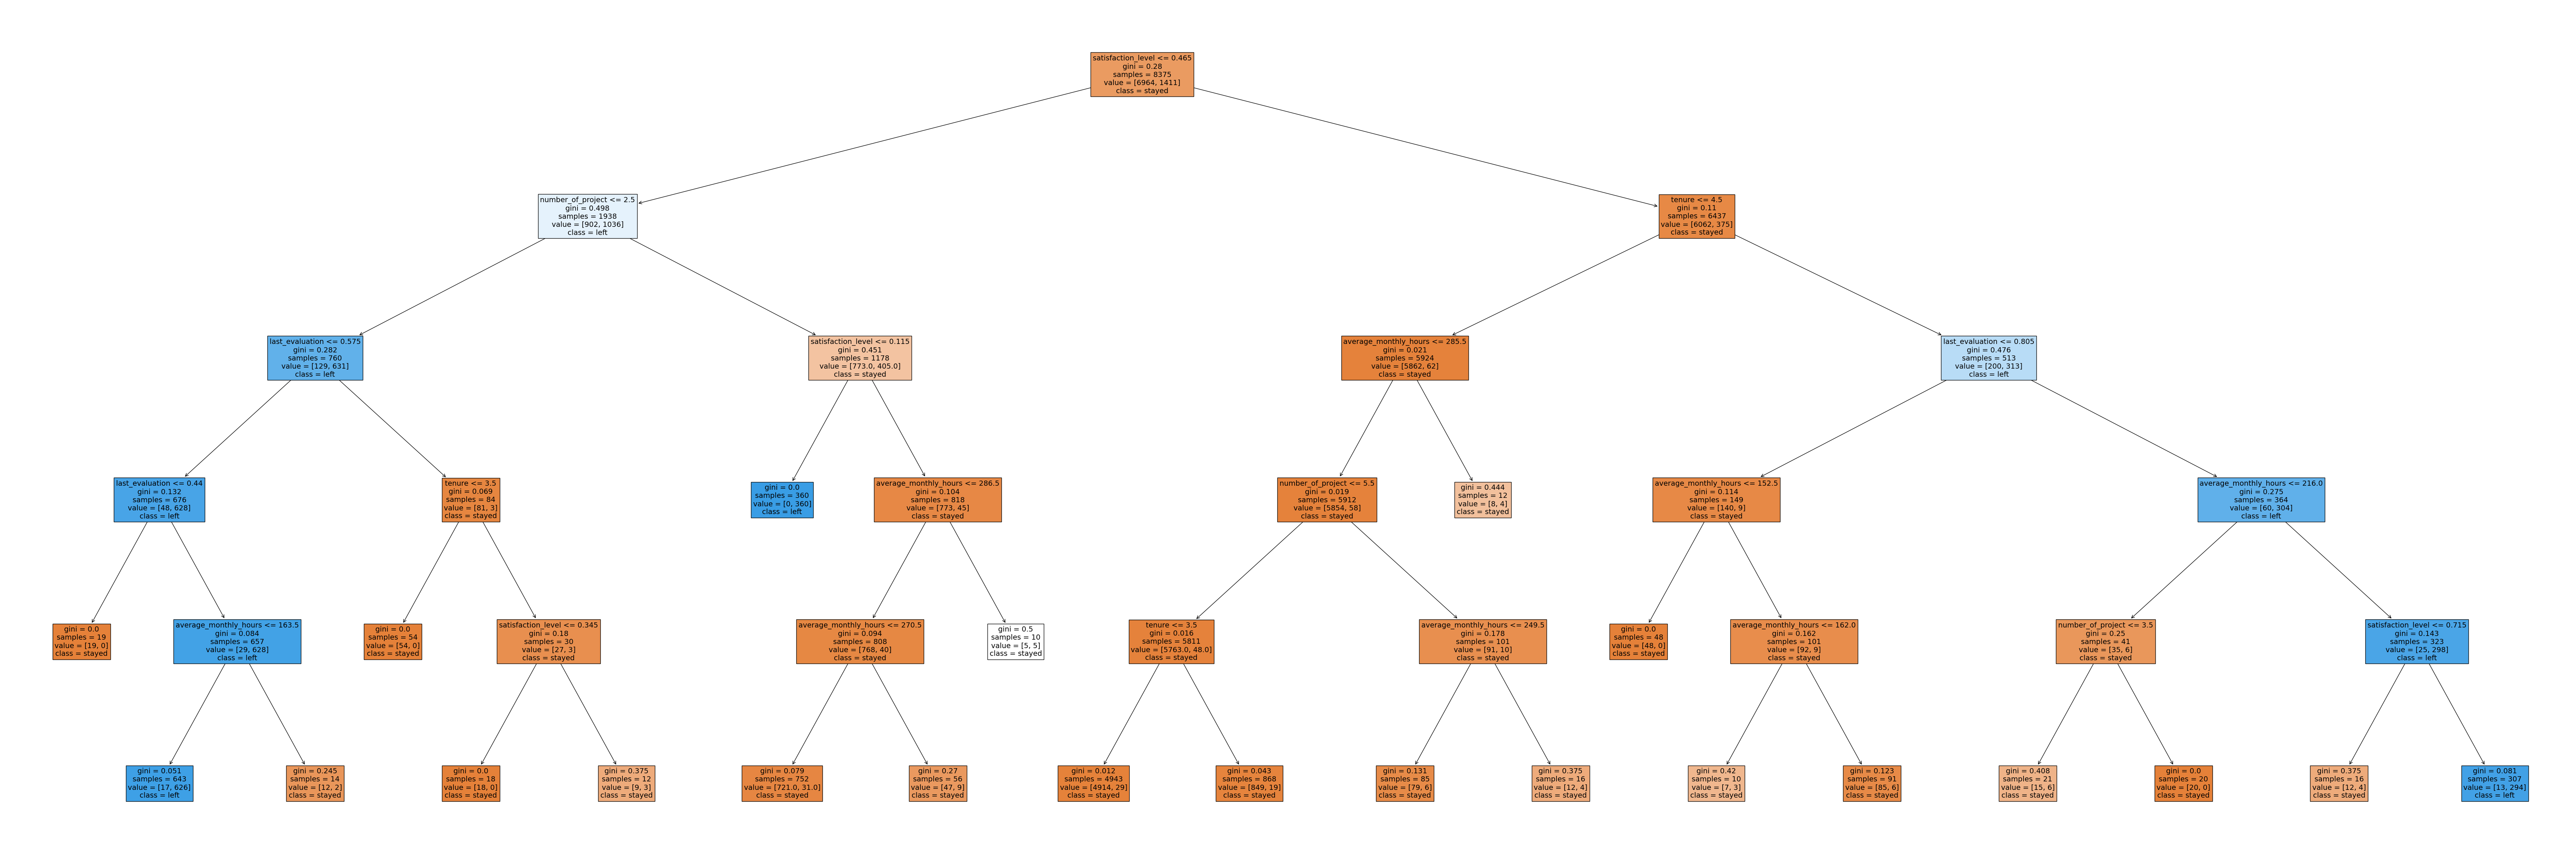

In [146]:
## ploting DecisionTree
plt.figure(figsize=(90,30))
plot_tree(tree1_cv.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

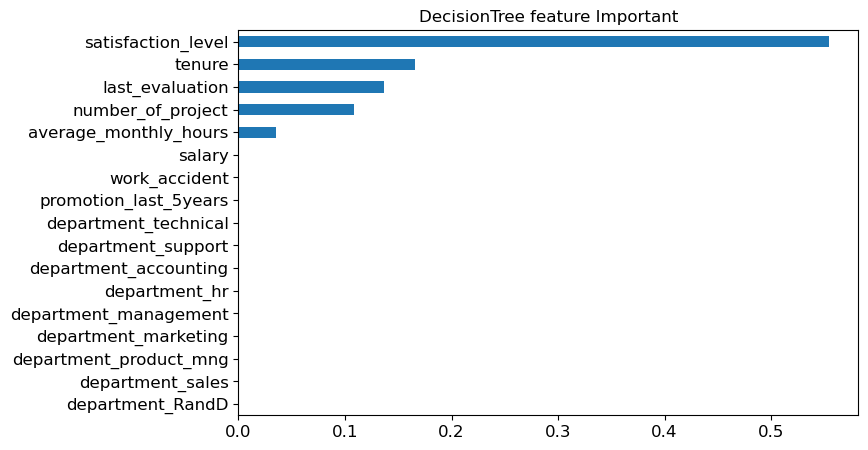

In [147]:
## Sorting the best fetures
plt.figure(figsize=(8,5))
tree_fet_impo = tree1_cv.best_estimator_.feature_importances_
tree_fet_impo = pd.Series(data=tree_fet_impo, index=X_test.columns).sort_values()
tree_fet_impo.plot.barh(fontsize=12)
plt.title('DecisionTree feature Important')
plt.show()

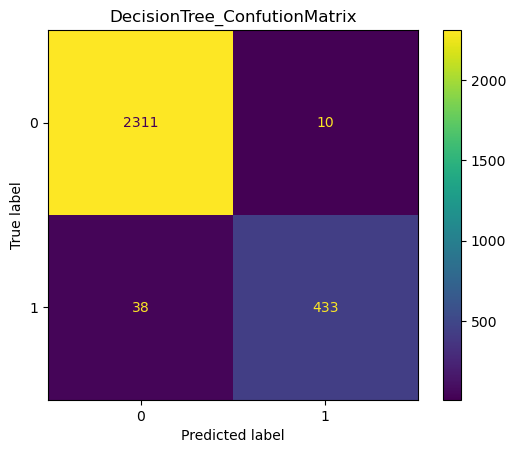

In [148]:
## ploting Confution Matrix for DecisionTree
cm_tree = confusion_matrix(y_test,y_pred_tree,labels=tree1_cv.classes_)
tree_dis = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree1_cv.classes_)
tree_dis.plot(values_format='')
plt.title('DecisionTree_ConfutionMatrix')
plt.show();

In [149]:
# metrics table on RandomForest model test set
tree_test_result = get_scores('DecisionTree_test',tree1_cv,X_test,y_test)
tree_test_result

,model,precision,recall,F1,accuracy,AUC
0,DecisionTree_test,0.977427,0.919321,0.947484,0.982808,0.957506


## RandomForest

In [151]:
## Cross Validating-GridSearchCV method for RandomForest
randomforest_mdl = RandomForestClassifier(random_state=0)
tree_param = {'max_depth': [3,5], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [2,3],
             'min_samples_split': [2,3],
             'n_estimators': [300]}
score = ['f1','precision','recall','accuracy', 'roc_auc']
## Gridsearch Cross valudation to get optimum parameters

randomforest1 = GridSearchCV(estimator=randomforest_mdl,scoring=score,param_grid=tree_param,cv=5,verbose=1,refit='roc_auc')

In [152]:
%%time
# Training the treee_cv(GriedsearchCV)

randomforest1.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: total: 1min 39s
Wall time: 1min 39s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3], 'n_estimators': [300]},
             refit='roc_auc',
             scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'],
             verbose=1)

In [153]:
# get model best scores and best parameter.
print('best score: ',randomforest1.best_score_)
print('best parameter: ',randomforest1.best_params_)

best score:  0.9805359007254969
best parameter:  {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}


In [155]:
y_preds = randomforest1.best_estimator_.predict(X_test)

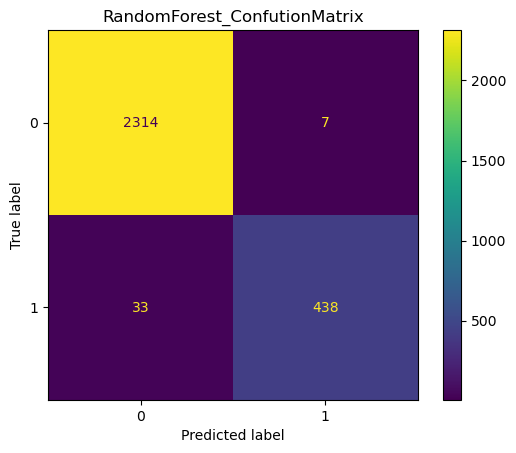

In [160]:
## ploting Confution Matrix for RandomForest
cm= confusion_matrix(y_test,y_preds,labels=randomforest1.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=randomforest1.classes_)
cm_disp.plot(values_format='')
plt.title('RandomForest_ConfutionMatrix')
plt.show();

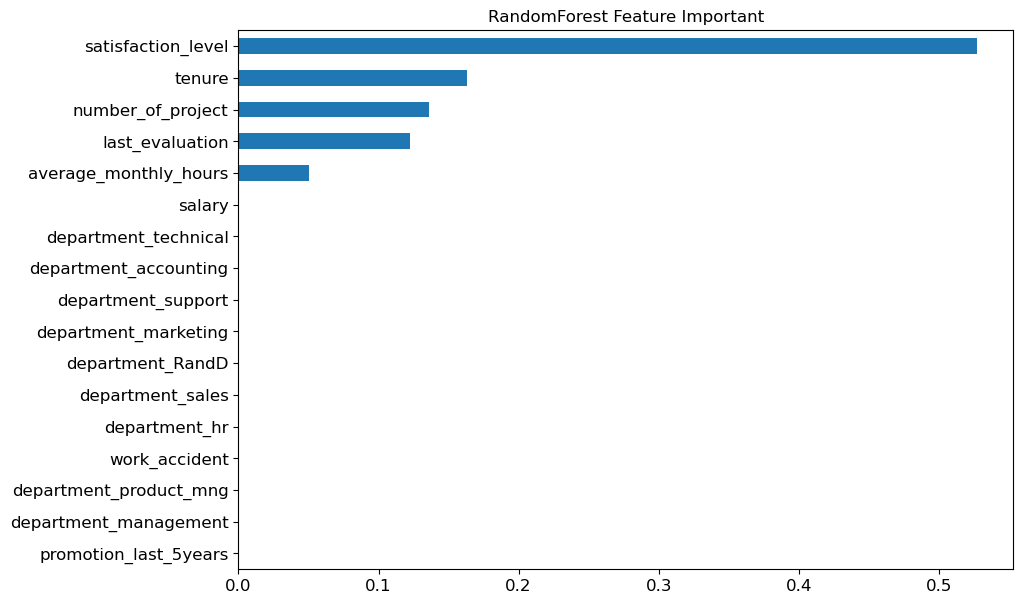

In [161]:
## Feature Important
fet_imp = randomforest1.best_estimator_.feature_importances_
rf_impor = pd.Series(fet_imp,index=X_test.columns).sort_values()
plt.figure(figsize=(10,7))
rf_impor.plot.barh(fontsize=12)
plt.title('RandomForest Feature Important')
plt.show()

In [162]:
## Analysing the test and training scores
rf_training_result = make_results('RandomForest1_traing', randomforest1,'auc')

rf_test_result = get_scores('RandomForest1_test', randomforest1,X_test, y_test)

rf_result = pd.concat([rf_training_result,rf_test_result],axis=0)
rf_result

,model,precision,recall,F1,accuracy,AUC
0,RandomForest1_traing,0.967547,0.906428,0.935864,0.979104,0.980536
0,RandomForest1_test,0.984270,0.929936,0.956332,0.985673,0.963460


## XGBoost

In [164]:
## Cross Validating-GridSearchCV method for XGBoost
xgb = XGBClassifier(objective='binary:logistic',random_state=0)
xgb_param = {'max_depth':[2,3],
            'learning_rate':[0.1],
            'min_child_weight':[3],
            'n_estimators':[50,100]}
xgb_cv = GridSearchCV(estimator=xgb, param_grid=xgb_param, scoring=score,cv=5,refit='roc_auc',verbose=1)

In [165]:
%%time
## training the model
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 1.86 s
Wall time: 1 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [2, 3],
                         'min_child_weight': [3], 'n_estimators': [50, 100]},
             refit='roc_auc',
             scoring=['f1', 'precision', 'recall', 'accuracy', 'roc_auc'],
             verbose=1)

In [166]:
# get model best scores and best parameter.
print('best score: ',xgb_cv.best_score_)
print('best parameter: ',xgb_cv.best_params_)

best score:  0.9836643219979069
best parameter:  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}


In [170]:
## Analysing the test and training scores
xgb_training_results = make_results('XGBoost_training',xgb_cv,'auc')

xgb_test_results = get_scores('XGBoost_test',xgb_cv,X_test,y_test)

xgb_results = pd.concat([xgb_training_results,xgb_test_results],axis=0)
xgb_results

,model,precision,recall,F1,accuracy,AUC
0,XGBoost_training,0.963534,0.912102,0.936955,0.979343,0.983664
0,XGBoost_test,0.971111,0.927813,0.948969,0.983166,0.961106


<Figure size 1000x700 with 0 Axes>

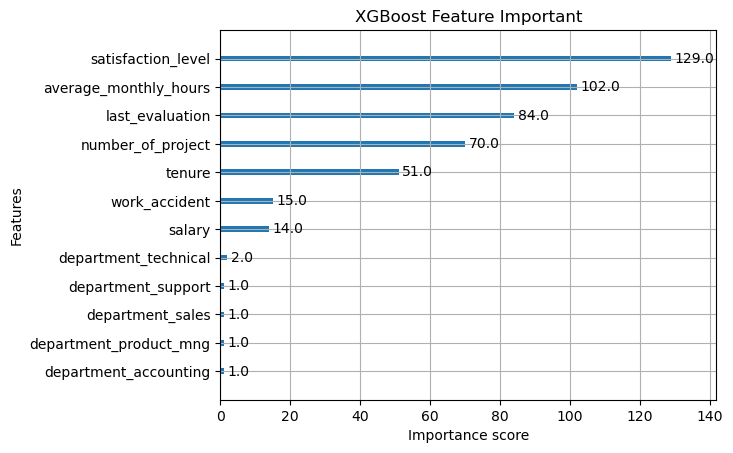

In [172]:
## Feature Important
plt.figure(figsize=(10,7))
plot_importance(xgb_cv.best_estimator_)
plt.title('XGBoost Feature Important')
plt.show();

## Model evaluation

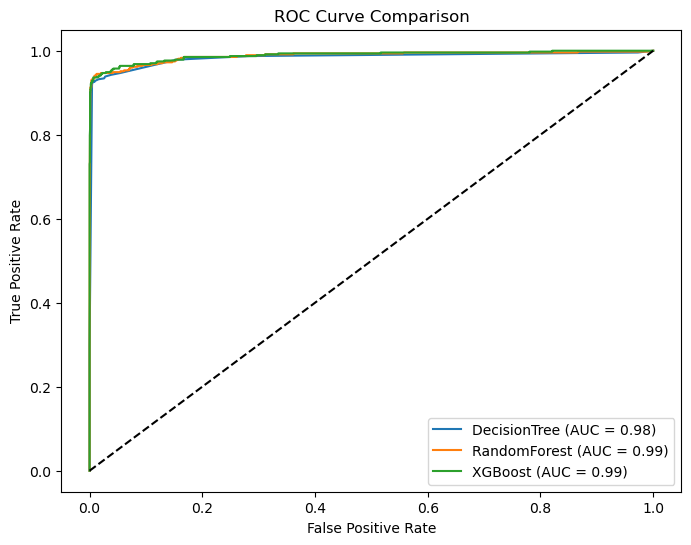

In [175]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
for model_name, model in [("DecisionTree", tree1_cv),("RandomForest", randomforest1), ("XGBoost", xgb_cv)]:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [177]:
# Comparing the RandomForest and XGBoost results
pd.concat([tree_test_result,rf_test_result, xgb_test_results],axis=0).sort_values('AUC',ascending=False)

,model,precision,recall,F1,accuracy,AUC
0,RandomForest1_test,0.984270,0.929936,0.956332,0.985673,0.963460
0,XGBoost_test,0.971111,0.927813,0.948969,0.983166,0.961106
0,DecisionTree_test,0.977427,0.919321,0.947484,0.982808,0.957506


Randomforest performened well when compared to other models with `precision_score of 0.98`, `Recall_score of 0.93`, `F_Score of 0.95`, `Accuracy of 0.98` and `AUC of 0.96`

## Summary of model results

**Tree-based Machine Learning**

After Model Evaluation, the Random Forest model achieved AUC of 96.3%, precision of 98.4%, recall of 92.9%, f1-score of 95.6%, and accuracy of 98.6%, on the test set. The random forest modestly outperformed then decision tree model and XGBoost model

### Conclusion and Recommendations

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 